In [2]:
# Importing important libraries

# For data cleaning and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# For preprocessing and building model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

## Data Cleaning

In [4]:
df = pd.read_csv("../input/data-science-job-salaries/ds_salaries.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../input/data-science-job-salaries/ds_salaries.csv'

In [58]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [59]:
# Drop unecessary columns
df.drop(["Unnamed: 0", "salary"], axis = 1, inplace = True)

In [60]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,USD,150000,US,50,US,L


In [61]:
# Checking data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_currency     607 non-null    object
 5   salary_in_usd       607 non-null    int64 
 6   employee_residence  607 non-null    object
 7   remote_ratio        607 non-null    int64 
 8   company_location    607 non-null    object
 9   company_size        607 non-null    object
dtypes: int64(3), object(7)
memory usage: 47.5+ KB


In [62]:
df["work_year"] = df["work_year"].astype("str")

In [63]:
# Checking and handling missing values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [64]:
# Renaming columns entries for clarity

# Experience Level
df["experience_level"] = df["experience_level"].map({"SE":"Senior", "MI":"Junior", "EN":"Entry", "EX":"Expert"})
# # Employment Type
df["employment_type"] = df["employment_type"].map({"FT":"Full-time", "PT":"Part-time", "CT":"Contract", "FL":"Freelance"})
# # Remote Ratio
df["remote_ratio"] = df["remote_ratio"].map({0:"Onsite", 50:"Hybrid", 100:"Remote"})
# Company Size
df["company_size"] = df["company_size"].map({"S":"Small", "M":"Medium", "L":"Large"})

In [14]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

le.fit(["EN", "MI", "SE", "EX", "FL", "CT", "PT", "FT", "S", "M", "L"])



le = preprocessing.LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"]), 

list(le.classes_)
le.transform(["tokyo", "tokyo", "paris"])
#list(le.inverse_transform([2, 2, 1]))

array([2, 2, 1])

In [13]:
le = preprocessing.LabelEncoder()

le.fit(["EN", "MI", "SE", "EX", "FL", "CT", "PT", "FT", "S", "M", "L"])
list(le.classes_)

print(le.transform(["EN", "EN", "MI", "SE",]))
print(le.transform(["FL", "CT", "PT","FT"]))
print(le.transform(["S", "M", "L", "S", "M", "L"] ))
le.transform(["EN", "MI", "SE", "EX", "FL", "CT", "PT", "FT", "S", "M", "L"])



[ 1  1  7 10]
[3 0 8 4]
[9 6 5 9 6 5]


array([ 1,  7, 10,  2,  3,  0,  8,  4,  9,  6,  5])

In [65]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Junior,Full-time,Data Scientist,EUR,79833,DE,Onsite,DE,Large
1,2020,Senior,Full-time,Machine Learning Scientist,USD,260000,JP,Onsite,JP,Small
2,2020,Senior,Full-time,Big Data Engineer,GBP,109024,GB,Hybrid,GB,Medium
3,2020,Junior,Full-time,Product Data Analyst,USD,20000,HN,Onsite,HN,Small
4,2020,Senior,Full-time,Machine Learning Engineer,USD,150000,US,Hybrid,US,Large


## Exploratory Data Analysis

## 1. Univariate Analysis

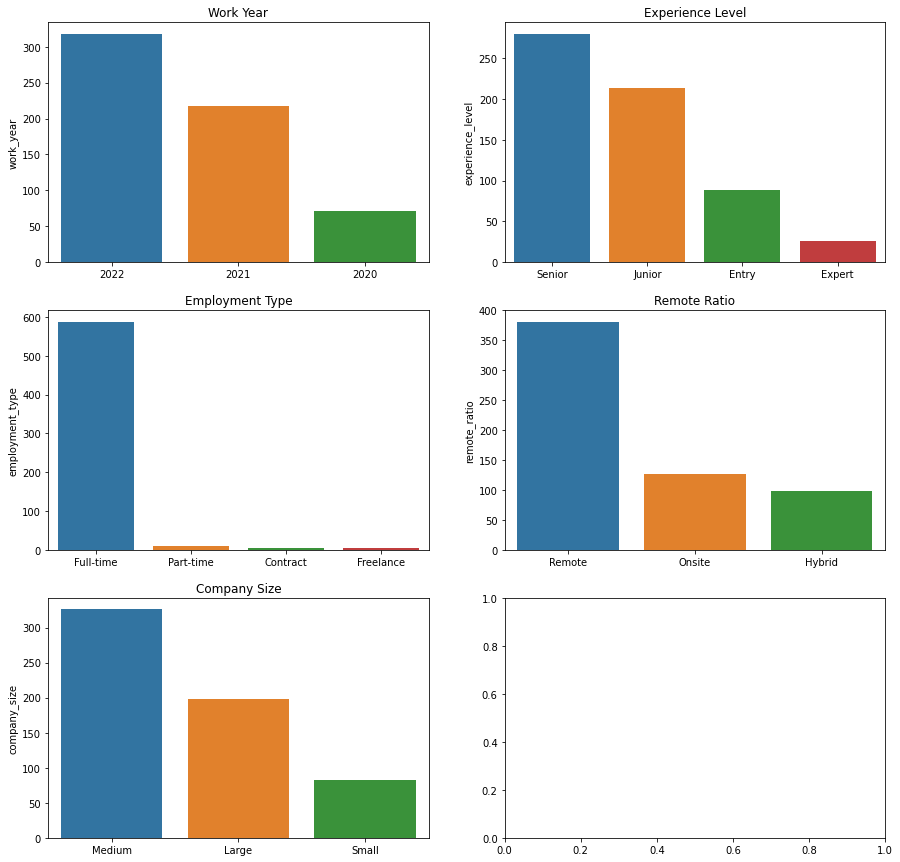

In [66]:
fig, axes = plt.subplots(3, 2, figsize = (15, 15))

sns.barplot(x = df["work_year"].value_counts().sort_values(ascending = False).index, y = df["work_year"].value_counts().sort_values(ascending = False), ax = axes[0][0])
axes[0][0].set_title("Work Year")

sns.barplot(x = df["experience_level"].value_counts().sort_values(ascending = False).index, y = df["experience_level"].value_counts().sort_values(ascending = False), ax = axes[0][1])
axes[0][1].set_title("Experience Level")

sns.barplot(x = df["employment_type"].value_counts().sort_values(ascending = False).index, y = df["employment_type"].value_counts().sort_values(ascending = False), ax = axes[1][0])
axes[1][0].set_title("Employment Type")

sns.barplot(x = df["remote_ratio"].value_counts().sort_values(ascending = False).index, y = df["remote_ratio"].value_counts().sort_values(ascending = False), ax = axes[1][1])
axes[1][1].set_title("Remote Ratio")

sns.barplot(x = df["company_size"].value_counts().sort_values(ascending = False).index, y = df["company_size"].value_counts().sort_values(ascending = False), ax = axes[2][0])
axes[2][0].set_title("Company Size");

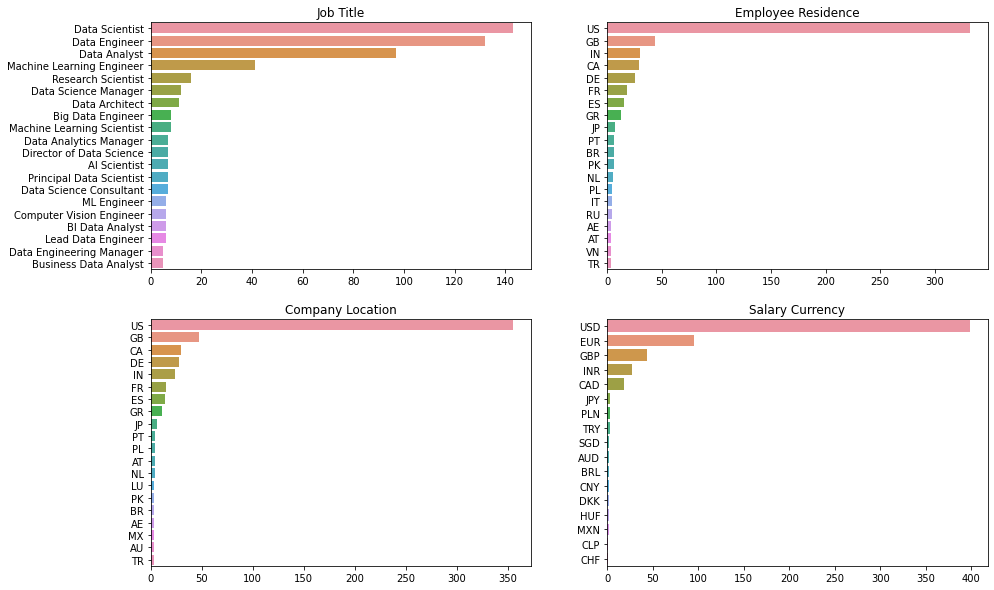

In [67]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10))

sns.barplot(x = df["job_title"].value_counts().sort_values(ascending = False).head(20), y = df["job_title"].value_counts().sort_values(ascending = False).head(20).index, ax = axes[0][0])
axes[0][0].set_title("Job Title")
axes[0][0].set_xlabel("")

sns.barplot(x = df["employee_residence"].value_counts().sort_values(ascending = False).head(20), y = df["employee_residence"].value_counts().sort_values(ascending = False).head(20).index, ax = axes[0][1])
axes[0][1].set_title("Employee Residence")
axes[0][1].set_xlabel("")

sns.barplot(x = df["company_location"].value_counts().sort_values(ascending = False).head(20), y = df["company_location"].value_counts().sort_values(ascending = False).head(20).index, ax = axes[1][0])
axes[1][0].set_title("Company Location")
axes[1][0].set_xlabel("")

sns.barplot(x = df["salary_currency"].value_counts().sort_values(ascending = False).head(20), y = df["salary_currency"].value_counts().sort_values(ascending = False).head(20).index, ax = axes[1][1])
axes[1][1].set_title("Salary Currency")
axes[1][1].set_xlabel("");

## 2. Multivariate Analysis

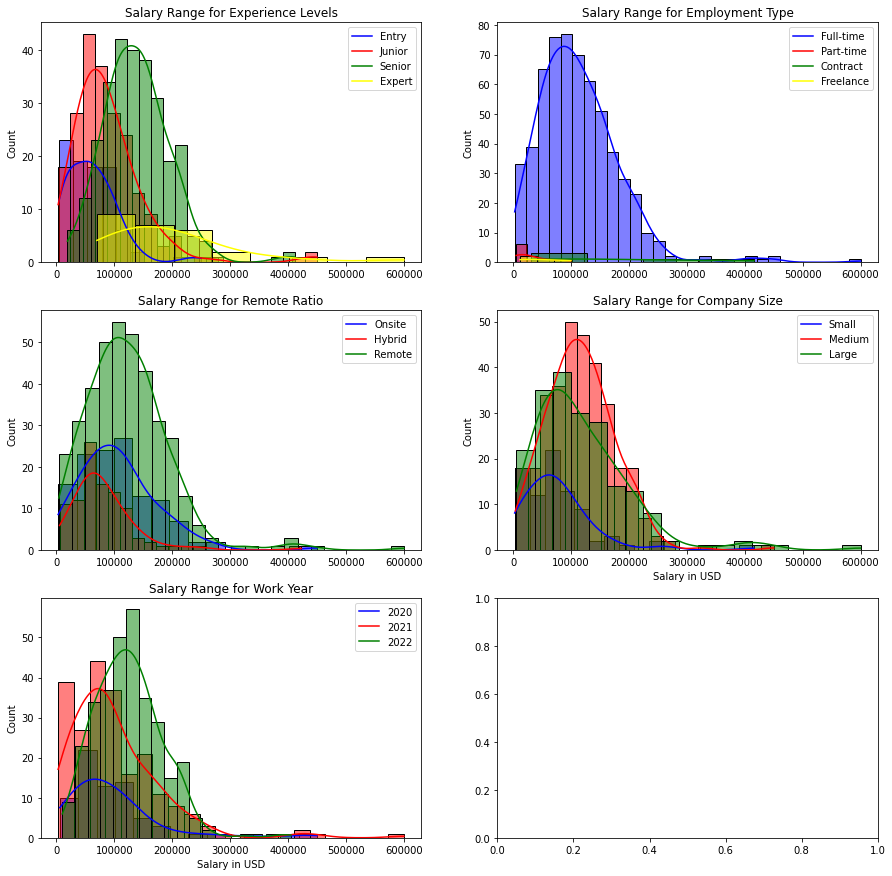

In [68]:
fig, axes = plt.subplots(3, 2, figsize = (15, 15))

sns.histplot(df.query("experience_level == 'Entry'")["salary_in_usd"], kde = True, color = "blue", ax = axes[0][0])
sns.histplot(df.query("experience_level == 'Junior'")["salary_in_usd"], kde = True, color = "red", ax = axes[0][0])
sns.histplot(df.query("experience_level == 'Senior'")["salary_in_usd"], kde = True, color = "green", ax = axes[0][0])
sns.histplot(df.query("experience_level == 'Expert'")["salary_in_usd"], kde = True, color = "yellow", ax = axes[0][0])
axes[0][0].legend(labels = ["Entry", "Junior", "Senior", "Expert"])
axes[0][0].set_xlabel("")
axes[0][0].set_title("Salary Range for Experience Levels")

sns.histplot(df.query("employment_type == 'Full-time'")["salary_in_usd"], kde = True, color = "blue", ax = axes[0][1])
sns.histplot(df.query("employment_type == 'Part-time'")["salary_in_usd"], kde = True, color = "red", ax = axes[0][1])
sns.histplot(df.query("employment_type == 'Contract'")["salary_in_usd"], kde = True, color = "green", ax = axes[0][1])
sns.histplot(df.query("employment_type == 'Freelance'")["salary_in_usd"], kde = True, color = "yellow", ax = axes[0][1])
axes[0][1].legend(labels = ["Full-time", "Part-time", "Contract", "Freelance"])
axes[0][1].set_xlabel("")
axes[0][1].set_title("Salary Range for Employment Type")

sns.histplot(df.query("remote_ratio == 'Onsite'")["salary_in_usd"], kde = True, color = "blue", ax = axes[1][0])
sns.histplot(df.query("remote_ratio == 'Hybrid'")["salary_in_usd"], kde = True, color = "red", ax = axes[1][0])
sns.histplot(df.query("remote_ratio == 'Remote'")["salary_in_usd"], kde = True, color = "green", ax = axes[1][0])
axes[1][0].legend(labels = ["Onsite", "Hybrid", "Remote"])
axes[1][0].set_xlabel("")
axes[1][0].set_title("Salary Range for Remote Ratio")

sns.histplot(df.query("company_size == 'Small'")["salary_in_usd"], kde = True, color = "blue", ax = axes[1][1])
sns.histplot(df.query("company_size == 'Medium'")["salary_in_usd"], kde = True, color = "red", ax = axes[1][1])
sns.histplot(df.query("company_size == 'Large'")["salary_in_usd"], kde = True, color = "green", ax = axes[1][1])
axes[1][1].legend(labels = ["Small", "Medium", "Large"])
axes[1][1].set_xlabel("Salary in USD")
axes[1][1].set_title("Salary Range for Company Size")

sns.histplot(df.query("work_year == '2020'")["salary_in_usd"], kde = True, color = "blue", ax = axes[2][0])
sns.histplot(df.query("work_year == '2021'")["salary_in_usd"], kde = True, color = "red", ax = axes[2][0])
sns.histplot(df.query("work_year == '2022'")["salary_in_usd"], kde = True, color = "green", ax = axes[2][0])
axes[2][0].legend(labels = ["2020", "2021", "2022"])
axes[2][0].set_xlabel("Salary in USD")
axes[2][0].set_title("Salary Range for Work Year");

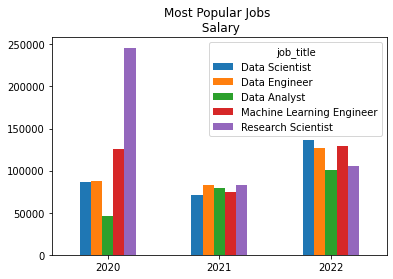

In [69]:
df.groupby(["work_year", "job_title"])["salary_in_usd"].mean().unstack().fillna(0).loc[:, ["Data Scientist", "Data Engineer", "Data Analyst", "Machine Learning Engineer", "Research Scientist"]].plot(kind = "bar")
plt.xlabel("")
plt.xticks(rotation = 0)
plt.title("Most Popular Jobs \n Salary");

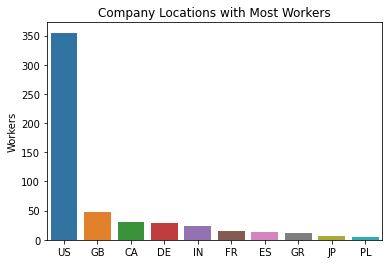

In [70]:
sns.barplot(x = df.groupby("company_location")["employee_residence"].count().sort_values(ascending = False).head(10).index, y = df.groupby("company_location")["employee_residence"].count().sort_values(ascending = False).head(10))
plt.xlabel("")
plt.ylabel("Workers")
plt.title("Company Locations with Most Workers");

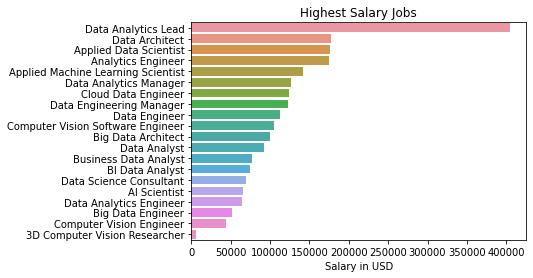

In [71]:
sns.barplot(x = df.groupby("job_title")["salary_in_usd"].mean().head(20).sort_values(ascending = False), 
            y = df.groupby("job_title")["salary_in_usd"].mean().head(20).sort_values(ascending = False).index)
plt.xlabel("Salary in USD")
plt.ylabel("")
plt.title("Highest Salary Jobs");

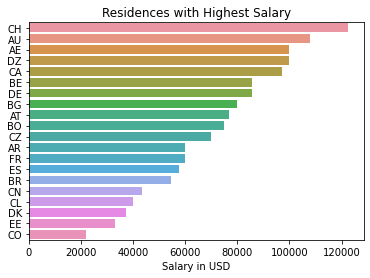

In [72]:
sns.barplot(x = df.groupby("employee_residence")["salary_in_usd"].mean().head(20).sort_values(ascending = False), 
            y = df.groupby("employee_residence")["salary_in_usd"].mean().head(20).sort_values(ascending = False).index)
plt.xlabel("Salary in USD")
plt.ylabel("")
plt.title("Residences with Highest Salary");

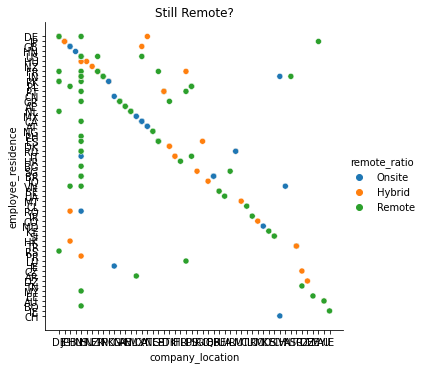

In [73]:
sns.relplot(x = df["company_location"], y = df["employee_residence"], hue = df["remote_ratio"])
plt.title("Still Remote?");

## Data Preprocessing

In [74]:
X = df.copy()
y = X.pop("salary_in_usd")

In [75]:
X.head()

,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2020,Junior,Full-time,Data Scientist,EUR,DE,Onsite,DE,Large
1,2020,Senior,Full-time,Machine Learning Scientist,USD,JP,Onsite,JP,Small
2,2020,Senior,Full-time,Big Data Engineer,GBP,GB,Hybrid,GB,Medium
3,2020,Junior,Full-time,Product Data Analyst,USD,HN,Onsite,HN,Small
4,2020,Senior,Full-time,Machine Learning Engineer,USD,US,Hybrid,US,Large


In [76]:
X.drop(["salary_currency", "company_location"], axis = 1, inplace = True)

In [77]:
X.head()

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_size
0,2020,Junior,Full-time,Data Scientist,DE,Onsite,Large
1,2020,Senior,Full-time,Machine Learning Scientist,JP,Onsite,Small
2,2020,Senior,Full-time,Big Data Engineer,GB,Hybrid,Medium
3,2020,Junior,Full-time,Product Data Analyst,HN,Onsite,Small
4,2020,Senior,Full-time,Machine Learning Engineer,US,Hybrid,Large


In [78]:
# For categorical column, do label encoder for ordinal data and one-hot encoder for nominal data

# Label Encoding
X["experience_level"] = X["experience_level"].map({"Entry":1, "Junior":2, "Senior":3, "Expert":4})
X["employment_type"] = X["employment_type"].map({"Freelance":1, "Contract":2, "Part-time":3, "Full-time":4})
X["company_size"] = X["company_size"].map({"Small":1, "Medium":2, "Large":3})

# One-Hot Encoding
X = pd.concat([pd.get_dummies(df["work_year"], drop_first = True), X], axis = 1)
X = pd.concat([pd.get_dummies(df["job_title"], drop_first = True), X], axis = 1)
X = pd.concat([pd.get_dummies(df["remote_ratio"], drop_first = True), X], axis = 1)
X = pd.concat([pd.get_dummies(df["employee_residence"], drop_first = True), X], axis = 1)
X.drop(["work_year", "job_title", "remote_ratio", "employee_residence"], axis = 1, inplace = True)

In [79]:
X.head()

,AR,AT,AU,BE,BG,BO,BR,CA,CH,CL,...,Principal Data Engineer,Principal Data Scientist,Product Data Analyst,Research Scientist,Staff Data Scientist,2021,2022,experience_level,employment_type,company_size
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,4,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,4,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,2,4,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,4,3


## Building Model

## 1. Linear Regression

In [80]:
linreg = LinearRegression()

In [81]:
scores = -1 * cross_val_score(linreg, X, y, cv = 10, scoring = "neg_mean_absolute_error")

In [82]:
scores.mean()

4.587650913260977e+16

## 2. Ridge Regression

In [83]:
ridge = Ridge()

In [84]:
scores = -1 * cross_val_score(ridge, X, y, cv = 10, scoring = "neg_mean_absolute_error")

In [85]:
scores.mean()

36112.31213642046

In [ ]:
# With Hyperparameter tuning, we can tune alpha
alpha = np.arange(0, 1, 0.01)
params = dict(alpha = alpha)
search = GridSearchCV(ridge, params, scoring = "neg_mean_absolute_error", cv = 10)
results = search.fit(X, y)
results.best_params_

In [86]:
ridge = Ridge(alpha = 0.99)
scores = -1 * cross_val_score(ridge, X, y, cv = 10, scoring = "neg_mean_absolute_error")
scores.mean()

36129.69028061905

## 3. Lasso Regression

In [87]:
lasso = Lasso()

In [88]:
scores = -1 * cross_val_score(lasso, X, y, cv = 10, scoring = "neg_mean_absolute_error")

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.623e+08, tolerance: 2.665e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.418e+09, tolerance: 2.710e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

In [89]:
scores.mean()

39987.371675418115

In [ ]:
# With Hyperparameter tuning, we can tune alpha
alpha = np.arange(0, 1, 0.01)
params = dict(alpha = alpha)
search = GridSearchCV(ridge, params, scoring = "neg_mean_absolute_error", cv = 10)
results = search.fit(X, y)
results.best_params_

In [90]:
lasso = Lasso(alpha = 0.9899999999999995)
scores = -1 * cross_val_score(lasso, X, y, cv = 10, scoring = "neg_mean_absolute_error")
scores.mean()

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.531e+08, tolerance: 2.665e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.674e+09, tolerance: 2.710e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

39988.91829528882

## 4. ElasticNET Regression

In [91]:
elastic = ElasticNet()

In [92]:
scores = -1 * cross_val_score(elastic, X, y, scoring = "neg_mean_absolute_error", cv = 10)

In [93]:
scores.mean()

39876.82438670298

In [ ]:
# With Hyperparameter tuning, we can tune alpha
alpha = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0]
l1_ratio = np.arange(0, 1, 0.01)
params = dict(alpha = alpha, l1_ratio = l1_ratio)
search = GridSearchCV(elastic, params, scoring = "neg_mean_absolute_error", cv = 10)
results = search.fit(X, y)
results.best_params_

In [94]:
elastic = ElasticNet(alpha = 0.1, l1_ratio = 0.77)
scores = -1 * cross_val_score(elastic, X, y, scoring = "neg_mean_absolute_error", cv = 10)
scores.mean()

33581.25359735556

## 5. Support Vector Regressor

In [97]:
scores.mean()

52601.23931029084

In [ ]:
# With Hyperparameter tuning
C = [0.1, 1, 10, 100]
gamma = [1, 0.1, 0.01, 0.001]
kernel = ["rbf", "poly", "sigmoid"]
params = dict(C = C, gamma = gamma, kernel = kernel)
search = GridSearchCV(svr, params, scoring = "neg_mean_absolute_error", cv = 10)
results = search.fit(X, y)
results.best_params_

In [98]:
svr = SVR(C = 1, gamma = 1, kernel = "poly")
scores = -1 * cross_val_score(svr, X, y, cv = 10, scoring = "neg_mean_absolute_error")
scores.mean()

32227.41412990513

## 6. RandomForest Regressor

In [99]:
rfr = RandomForestRegressor()

In [100]:
scores = -1 * cross_val_score(rfr, X, y, cv = 10, scoring = "neg_mean_absolute_error")
scores.mean()

34658.961325185395

In [ ]:
# With Hyperparameter tuning
max_leaf_nodes = [2, 3, 4, 5, 6, 7]
min_samples_split = [5, 10, 20, 50]
max_depth = [5,10,15,20]
n_estimators = [50, 100, 200]
params = dict(max_leaf_nodes = max_leaf_nodes, min_samples_split = min_samples_split, 
              max_depth = max_depth, n_estimators = n_estimators)
search = GridSearchCV(rfr, params, scoring = "neg_mean_absolute_error", cv = 10)
results = search.fit(X, y)
results.best_params_

In [101]:
rfr = RandomForestRegressor(max_depth = 10, max_leaf_nodes = 7, 
                            min_samples_split = 5, n_estimators = 50)
scores = -1 * cross_val_score(rfr, X, y, cv = 10, scoring = "neg_mean_absolute_error")
scores.mean()

36764.23301886138

## 7. XGB Regressor

In [102]:
xgb = XGBRegressor()

In [103]:
scores = -1 * cross_val_score(xgb, X, y, cv = 10, scoring = "neg_mean_absolute_error")
print(scores.mean())

42494.7375629696


In [ ]:
# With Hyperparameter tuning
n_estimators = [i for i in range(100, 1001, 100)]
learning_rate = np.arange(1, 0, -0.01)
params = dict(n_estimators = n_estimators, learning_rate = learning_rate)
search = GridSearchCV(xgb, params, scoring = "neg_mean_absolute_error", cv = 10)
results = search.fit(X, y)
results.best_params_

In [104]:
xgb = XGBRegressor(n_estimators = 1000, learning_rate = 0.01999999999999913)
scores = -1 * cross_val_score(xgb, X, y, cv = 10, scoring = "neg_mean_absolute_error")
scores.mean()

36444.02377422729

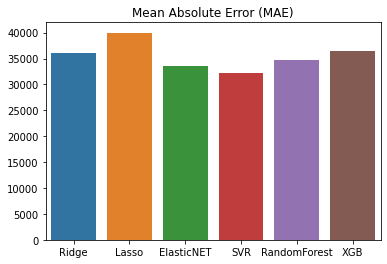

In [105]:
# Omitted linear regression because MAE its too large
MAE_list = [36112.31213642047, 39987.371675418115, 33581.25359735556, 32227.41412990513, 34658.961325185395, 36444.02377422729]
models = ["Ridge", "Lasso", "ElasticNET", "SVR", "RandomForest", "XGB"]
sns.barplot(x = models, y = MAE_list)
plt.title("Mean Absolute Error (MAE)");

## Making Predictions

In [106]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 1)

In [107]:
# Using SVR that has the lowest MAE
model = SVR(C = 1, gamma = 1, kernel = "poly")
model.fit(X_train, y_train)
preds = model.predict(X_valid)
mean_absolute_error(preds, y_valid)

29652.64932542852

## Conclusion

*   Experience level and Employment type highly effects the amount of salary.
*   Data Scientist, Data Engineer, Data Analyst, Machine Learning Engineer, and Research Scientist are the most popular jobs based on the survey made by the site and the salaries are continuously growing.
*   Most of work activities are still done remotely.
*   Workers mostly are from american companies.
*   Using K-Fold Cross Validation and Hyperparameter tuning, the most optimal model is Support Vector Regressor (SVR) that has the lowest Mean Absolute Error (MAE).



